## Learning = Representation + Evaluation + Optimization


### -Machine learning means learning from data

In [216]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [243]:
x=list(range(150))
y=np.random.randint(1,20,150)+x

train_x=np.array(x)
train_y=np.array(y)

In [244]:
print("x:",train_x[1:10], "\ny:",train_y[1:10])

x: [1 2 3 4 5 6 7 8 9] 
y: [10  8 18 22 17 16 20 19 17]


In [245]:
model = LinearRegression(fit_intercept=True)
model.fit(train_x[:,np.newaxis], train_y[:,np.newaxis])

LinearRegression()

In [246]:
yfit=model.predict(train_x[:,np.newaxis])


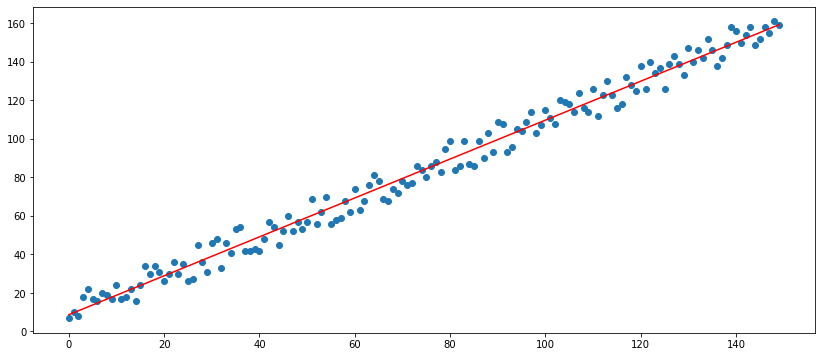

In [247]:
plt.figure(figsize=(14,6))
plt.scatter(train_x, train_y)
plt.plot(train_x, yfit, color='red');
plt.show()

In [248]:
print("Coef:",model.coef_, " Intercept:",model.intercept_)


Coef: [[1.01059069]]  Intercept: [8.71099338]


In [249]:
print(model.intercept_+model.coef_*[1,2,3,4])


[[ 9.72158407 10.73217476 11.74276546 12.75335615]]


In [250]:
print(yfit[1:5])


[[ 9.72158407]
 [10.73217476]
 [11.74276546]
 [12.75335615]]


In [251]:
train_y.shape

(150,)

In [252]:
yfit.shape

(150, 1)

In [253]:
train_x.shape

(150,)

### np.newaxis and reshape both are same, use interchangeably:  for used to increase the dimension of the existing array

In [254]:
train_x[:,np.newaxis].shape

(150, 1)

In [255]:
train_x_reshape=train_x.reshape(-1,1)

In [256]:
train_x_reshape

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

## Regression with Keras

In [168]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error

In [281]:
random.seed(123)
def CreateDataset(N):
 a,b,c,y = [],[],[],[]
 for i in range(N):    
  aa = i/20+random.uniform(-4,3)
  bb = i/40+random.uniform(-4,4)
  cc = i/50+random.uniform(-3,3)-5
  yy = (aa+bb+cc/2)/3
  a.append([aa])
  b.append([bb])
  c.append([cc])
  y.append([yy])
 return np.hstack([a,b,c]), np.array(y)

In [282]:
for i in range(250):
    aa = i/20+random.uniform(-4,3)
    print(aa)


-3.63345480804339
-3.339693257341574
-1.0493076543072117
-3.0960983554309265
2.5083921456618627
-3.4829243372837433
0.053414280237488565
-1.324616110432241
2.36460633250558
-2.4323632229462104
-1.1394834002350716
-1.113425237597313
-1.6838565323767223
-3.33830612494544
-0.24606944609347114
-2.63670550174704
0.983196251415934
-2.660861269785723
-0.8917871838489567
0.08825195814860609
3.337790565991492
-2.300648070350534
-1.9047745489794923
2.680502910511611
-2.6513481762810756
3.628053836632245
1.3138565997664904
-0.7927480631690567
3.264863509365941
2.831563232359885
-0.09576489290824775
3.1604761390442304
-0.9519627053372202
1.9123176833338733
1.3895246651299165
3.4153696725066336
0.006842065511916795
0.6376670602752945
3.284953629397467
1.5392649370484552
2.7938605306270423
2.518472850138491
2.766603417512267
4.380689993758317
1.6029552910049478
2.929291553322029
0.9216514227573831
-1.427110852812287
3.679212203012105
-0.27974558859471355
4.241331291036817
4.945521383049607
3.2065191

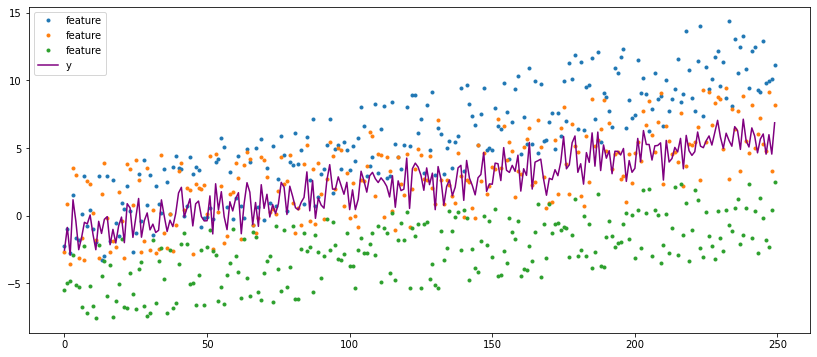

In [283]:
N = 250
x,y = CreateDataset(N)
x_ax = range(N)
plt.figure(figsize=(14,6))
plt.plot(x_ax, x, 'o', label="feature", markersize=3)
plt.plot(x_ax, y, lw=1.5, color="purple", label="y")
plt.legend()
plt.show()

In [284]:
regressor = KerasRegressor(build_fn=BuildModel,nb_epoch=100,batch_size=3)
regressor.fit(x,y) 

Train on 250 samples
250/250 [==============================] - 0s 2ms/sample - loss: 0.6746


In [285]:
y_pred = regressor.predict(x)


In [286]:
mse_krr = mean_squared_error(y, y_pred)
print(mse_krr)

0.22053894237864033


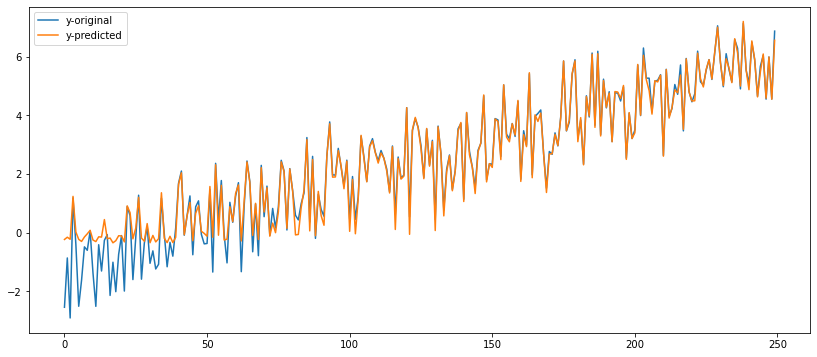

In [287]:
plt.figure(figsize=(14,6))
plt.plot(y, label="y-original")
plt.plot(y_pred, label="y-predicted")
plt.legend()
plt.show()

In [288]:
def BuildModel():
 model = Sequential()
 model.add(Dense(128, input_dim=3,activation='relu')) 
 model.add(Dense(32, activation='relu')) 
 model.add(Dense(8,activation='relu')) 
 model.add(Dense(1,activation='linear'))
 model.compile(loss="mean_squared_error", optimizer="adam")   
 return model


In [289]:
BuildModel().summary()


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 128)               512       
_________________________________________________________________
dense_45 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_46 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 9         
Total params: 4,913
Trainable params: 4,913
Non-trainable params: 0
_________________________________________________________________


In [290]:
model = BuildModel()
model.fit(x, y, nb_epoch=100, verbose=1, shuffle=False)


Train on 250 samples
Epoch 1/100
250/250 [==============================] - 0s 1ms/sample - loss: 2.1733
Epoch 2/100
250/250 [==============================] - 0s 87us/sample - loss: 0.6008
Epoch 3/100
250/250 [==============================] - 0s 87us/sample - loss: 0.5191
Epoch 4/100
250/250 [==============================] - 0s 106us/sample - loss: 0.3802
Epoch 5/100
250/250 [==============================] - 0s 90us/sample - loss: 0.3067
Epoch 6/100
250/250 [==============================] - 0s 89us/sample - loss: 0.2873
Epoch 7/100
250/250 [==============================] - 0s 94us/sample - loss: 0.2568
Epoch 8/100
250/250 [==============================] - 0s 83us/sample - loss: 0.1980
Epoch 9/100
250/250 [==============================] - 0s 91us/sample - loss: 0.1428
Epoch 10/100
250/250 [==============================] - 0s 88us/sample - loss: 0.1028
Epoch 11/100
250/250 [==============================] - 0s 89us/sample - loss: 0.0735
Epoch 12/100
250/250 [====================

250/250 [==============================] - 0s 89us/sample - loss: 0.0213
Epoch 94/100
250/250 [==============================] - 0s 104us/sample - loss: 0.0233
Epoch 95/100
250/250 [==============================] - 0s 103us/sample - loss: 0.0438
Epoch 96/100
250/250 [==============================] - 0s 71us/sample - loss: 0.0420
Epoch 97/100
250/250 [==============================] - 0s 86us/sample - loss: 0.0242
Epoch 98/100
250/250 [==============================] - 0s 74us/sample - loss: 0.0654
Epoch 99/100
250/250 [==============================] - 0s 76us/sample - loss: 0.0522
Epoch 100/100
250/250 [==============================] - 0s 81us/sample - loss: 0.0085


In [291]:
y_krm = model.predict(x) 

In [292]:
mse_krm=mean_squared_error(y, y_krm)
print(mse_krm)


0.004598052517466117


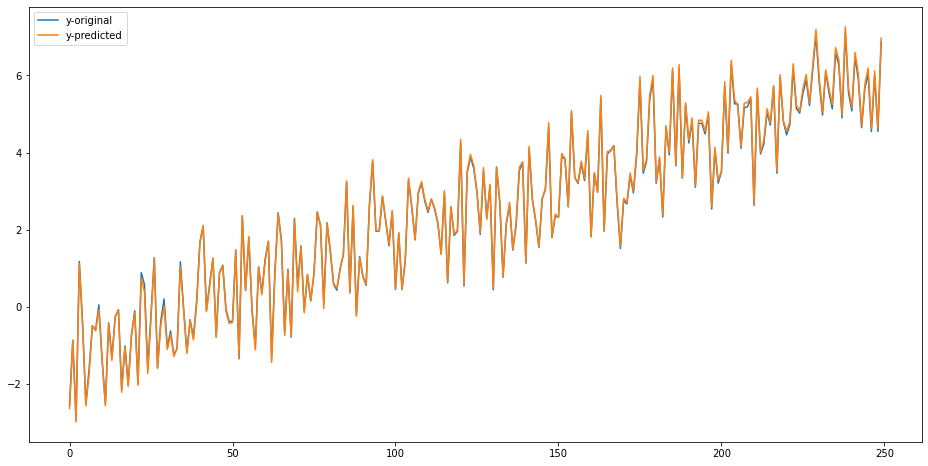

In [293]:
plt.figure(figsize=(16,8))
plt.plot(y, label="y-original")
plt.plot(y_krm, label="y-predicted")
plt.legend()
plt.show()

In [41]:
#Loading data
data = pd.read_csv("/home/sonal/Downloads/SSH_SST_Pacific.txt", delim_whitespace=True)

In [42]:
data

,Day,Month,Year,SSH,SST
0,(m),(C),NaN,NaN,NaN
1,1,1,1993.0,1.084933,19.395215
2,2,1,1993.0,1.084017,19.322703
3,3,1,1993.0,1.073641,19.307321
4,4,1,1993.0,1.078829,19.384960
...,...,...,...,...,...
9486,21,12,2018.0,1.117893,21.234382
9487,22,12,2018.0,1.114536,21.116459
9488,23,12,2018.0,1.105686,21.057863
9489,24,12,2018.0,1.094699,21.062258


In [43]:
data=data[1:] #delete top row

In [44]:
data_SST=data.drop(columns='SSH')

In [45]:
data_SST

,Day,Month,Year,SST
1,1,1,1993.0,19.395215
2,2,1,1993.0,19.322703
3,3,1,1993.0,19.307321
4,4,1,1993.0,19.384960
5,5,1,1993.0,19.454543
...,...,...,...,...
9486,21,12,2018.0,21.234382
9487,22,12,2018.0,21.116459
9488,23,12,2018.0,21.057863
9489,24,12,2018.0,21.062258


In [46]:
data_SST.reset_index(inplace = True) 


In [47]:
data_SST

,index,Day,Month,Year,SST
0,1,1,1,1993.0,19.395215
1,2,2,1,1993.0,19.322703
2,3,3,1,1993.0,19.307321
3,4,4,1,1993.0,19.384960
4,5,5,1,1993.0,19.454543
...,...,...,...,...,...
9485,9486,21,12,2018.0,21.234382
9486,9487,22,12,2018.0,21.116459
9487,9488,23,12,2018.0,21.057863
9488,9489,24,12,2018.0,21.062258


In [48]:
del data_SST['index']

In [49]:
data_SST

,Day,Month,Year,SST
0,1,1,1993.0,19.395215
1,2,1,1993.0,19.322703
2,3,1,1993.0,19.307321
3,4,1,1993.0,19.384960
4,5,1,1993.0,19.454543
...,...,...,...,...
9485,21,12,2018.0,21.234382
9486,22,12,2018.0,21.116459
9487,23,12,2018.0,21.057863
9488,24,12,2018.0,21.062258


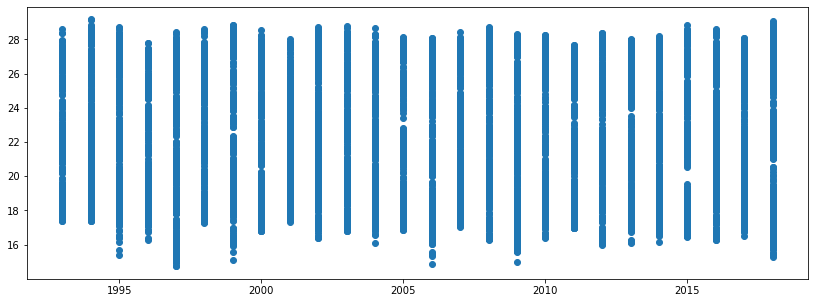

In [57]:
plt.figure(figsize=(14,5))
plt.scatter(data_SST.Year,data_SST.SST)
plt.show()

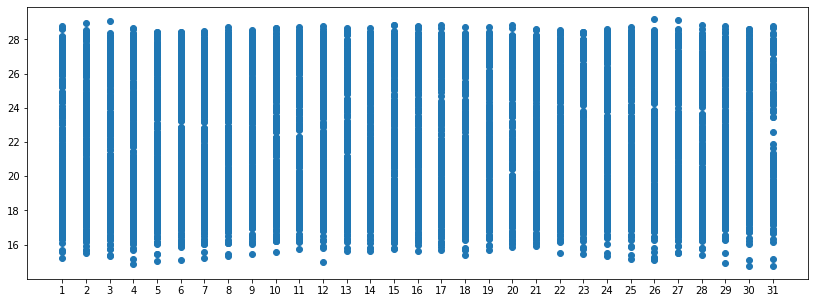

In [58]:
plt.figure(figsize=(14,5))
plt.scatter(data_SST.Day,data_SST.SST)
plt.show()

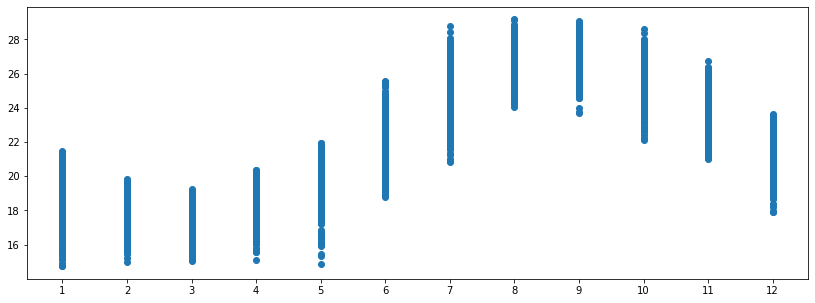

In [59]:
plt.figure(figsize=(14,5))
plt.scatter(data_SST.Month,data_SST.SST)
plt.show()

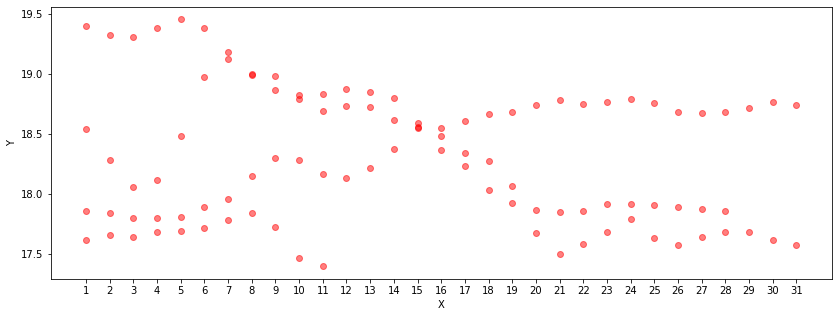

In [124]:
plt.figure(figsize=(14,5))

from matplotlib import pyplot as plt
plt.scatter(data_SST.Day.loc[:100],data_SST.SST.loc[:100], c = "red",alpha=.5, marker = 'o')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

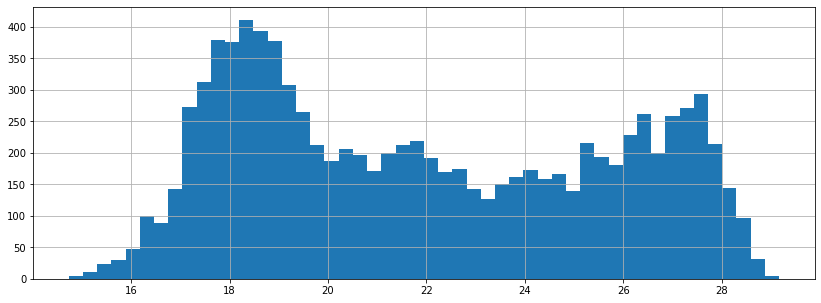

In [74]:
plt.figure(figsize=(14,5))
data_SST.SST.hist(bins=50)

In [105]:
subsetDataFrame_1993 = data_SST[data_SST['Year'] == 1993.0]


In [106]:
del subsetDataFrame_1993['Month']

In [107]:
del subsetDataFrame_1993['Year']

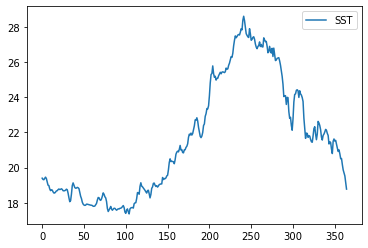

In [109]:
subsetDataFrame_1993.plot()

In [110]:
subsetDataFrame_2018 = data_SST[data_SST['Year'] == 2018.0]

In [111]:
del subsetDataFrame_2018['Month']

In [112]:
del subsetDataFrame_2018['Year']

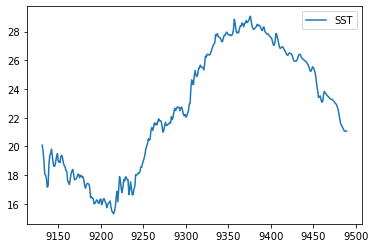

In [113]:
subsetDataFrame_2018.plot()

In [187]:
data_SST

,Day,Month,Year,SST
0,1,1,1993.0,19.395215
1,2,1,1993.0,19.322703
2,3,1,1993.0,19.307321
3,4,1,1993.0,19.384960
4,5,1,1993.0,19.454543
...,...,...,...,...
9485,21,12,2018.0,21.234382
9486,22,12,2018.0,21.116459
9487,23,12,2018.0,21.057863
9488,24,12,2018.0,21.062258


In [193]:
#Input values of features
X = data_SST.drop(columns='SST')
print('shape of X: ',X.shape)

#Output values of features
y = data_SST.SST.values.reshape(-1,1)
print('shape of y: ',y.shape)

#splitting data into train and test set
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

shape of X:  (9490, 3)
shape of y:  (9490, 1)


In [195]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7592, 3)
(7592, 1)
(1898, 3)
(1898, 1)


In [208]:
model_SST = BuildModel()
model_SST.fit(npp, y_train, nb_epoch=100, verbose=1, shuffle=False)


Train on 7592 samples
Epoch 1/100
7592/7592 [==============================] - 0s 54us/sample - loss: 162.7952
Epoch 2/100
7592/7592 [==============================] - 0s 31us/sample - loss: 14.0263
Epoch 3/100
7592/7592 [==============================] - 0s 28us/sample - loss: 12.9324
Epoch 4/100
7592/7592 [==============================] - 0s 28us/sample - loss: 11.7310
Epoch 5/100
7592/7592 [==============================] - 0s 28us/sample - loss: 10.4412
Epoch 6/100
7592/7592 [==============================] - 0s 28us/sample - loss: 10.1880
Epoch 7/100
7592/7592 [==============================] - 0s 30us/sample - loss: 9.9976
Epoch 8/100
7592/7592 [==============================] - 0s 30us/sample - loss: 9.8005
Epoch 9/100
7592/7592 [==============================] - 0s 29us/sample - loss: 9.5372
Epoch 10/100
7592/7592 [==============================] - 0s 33us/sample - loss: 9.3111
Epoch 11/100
7592/7592 [==============================] - 0s 39us/sample - loss: 9.3225
Epoch 12/100

Epoch 93/100
7592/7592 [==============================] - 0s 54us/sample - loss: 4.0229
Epoch 94/100
7592/7592 [==============================] - 0s 48us/sample - loss: 3.7551
Epoch 95/100
7592/7592 [==============================] - 0s 43us/sample - loss: 3.6825
Epoch 96/100
7592/7592 [==============================] - 0s 40us/sample - loss: 3.3949
Epoch 97/100
7592/7592 [==============================] - 0s 43us/sample - loss: 3.1699
Epoch 98/100
7592/7592 [==============================] - 0s 44us/sample - loss: 2.8893
Epoch 99/100
7592/7592 [==============================] - 0s 41us/sample - loss: 2.4736
Epoch 100/100
7592/7592 [==============================] - 0s 44us/sample - loss: 2.3330


In [199]:
y_train

array([[22.22830897],
       [22.05618457],
       [18.66716514],
       ...,
       [17.91933958],
       [21.39625233],
       [23.45149083]])

In [206]:
npp=x_train.astype(int)

In [207]:
npp

,Day,Month,Year
7490,5,7,2013
8744,10,12,2016
6595,22,1,2011
2797,29,8,2000
7047,18,4,2012
...,...,...,...
7891,10,8,2014
9225,5,4,2018
4859,22,4,2006
3264,9,12,2001


In [213]:
y_krm_sst = model.predict(x_train.astype(int)) 

In [214]:
mse_krm_sst=mean_squared_error(y_train, y_krm_sst)
print(mse_krm_sst)

19012.959518963115


In [215]:
y_krm_sst

array([[154.57088],
       [160.14333],
       [160.7634 ],
       ...,
       [161.94191],
       [158.48477],
       [164.19583]], dtype=float32)